In [2]:
import cv2
import os

video_path = '.\\Note_s3\\car.mp4' # 영상 원본 경로
output_path = '.\\Note_s3\\frames_ROI' # 추출 경로

os.makedirs(output_path, exist_ok=True)
cap = cv2.VideoCapture(video_path)

# ROI 정의 ( x, y, w, h)
# x1, y1 = 318, 109
# x2, y2 = 569, 163
# roi1 = (x1, y1 , 361 - x1 ,152 - y1 ) # ROI1: 왼쪽 상단
# roi2 = (x2, y2 , 625 - x2 ,224 - y2 ) # ROI2: 오른쪽 상단

frame_count = 0
while True:
    ret , frame = cap.read()
    if not ret: break
    # x1, y1, w1, h1 = roi1
    # cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)

    # ROI 1 마킹: 초록색
    cv2.rectangle(frame, (318, 109),(361, 152),(0, 255, 0), 2)
    # ROI 2 마킹: 파란색
    cv2.rectangle(frame, (569, 163),(625, 224),(255, 0, 0), 2)

    frame_filename = os.path.join(output_path, f"frame_ROI{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)

    frame_count += 1
cap.release()
print(f'{frame_count}개의 프레임을 ROI 마킹 포함하여 추출완료.')

316개의 프레임을 ROI 마킹 포함하여 추출완료.


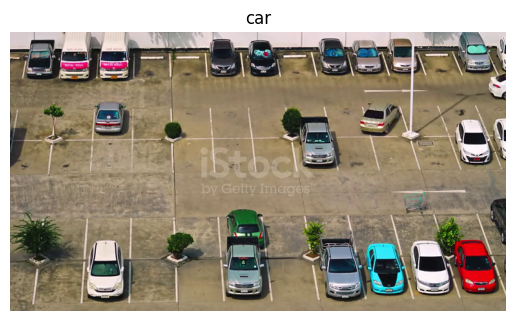

In [3]:
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(video_path)

ret , frame = cap.read()
if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title("car")
    plt.axis("off")
    plt.show()


In [4]:
# 특정 프레임 이동 후 저장
cap = cv2.VideoCapture(video_path)
position = 229
cap.set(cv2.CAP_PROP_POS_FRAMES, position)
ret , frame = cap.read()
pick = os.path.join(".\\Note_s3\\", f"frame_{position}.jpg")
cv2.imwrite(pick,frame)
cap.release()
print("프레임의 행렬크기", frame.shape) # y, x 바뀜

프레임의 행렬크기 (432, 768, 3)
